<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/Density_Based_Spatial_Clustering_of_Applications_with_Noise_ML_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DBSCAN
Estimated time needed: 30 minutes

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering.

Use cases of DBSCAN:
Recommender systems that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).
Anomaly detection that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.
Customer segmentation that aims at separating customers into multiple clusters, and devise targeted marketing strategy based on each cluster's characteristics.
When is DBSCAN better than K-Means?
You are a Data Scientist working for a retail company, and the marketing team wants you to use Data Science techniques to divide the company's customer base into groups of individuals that are similar in specific aspects such as age, gender, and spending behavior, so that they could devise targeted marketing strategy for each group based on its average spending on various product categories.

In this case, since you don't know what would be the optimal number of groups/clusters to look for in the customer base, you can't use K-Means as it requires you to specify the number of clusters.

Besides, since the marketing team wants to understand the average spendings of each group in order to devise its corresponding promotion, we should use an algorithm that's more robust to outliers.


Image from PxHere

In this notebook, we will look at a clustering technique using DBSCAN, which help us overcome the two aforementioned shortcomings of the K-Means clustering. Also, we will be able to look at the handwriting example to prove whether someones handwriting is bad, using DBSCAN.

Table of Contents
Objectives
Setup
Installing Required Libraries
Importing Required Libraries
Background
How does DBSCAN work?
Example 1: Visual Example
Example 2: Proving your friend has bad handwriting
Exercises

Exercise 1 - Find the number of clusters
Exercise 2 - Find the % of data marked as noise
Exercise 3 - Visualize the clustered data using matplotlib.pyplot
Objectives
After completing this lab you will be able to:

Explain what DBSCAN does and how it works.
Understand the strengths, weaknesses, and use cases of DBSCAN.
Setup
For this lab, we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.
matplotlib for visualizing the data.
scipy for complex numerical operations.
sklearn for machine learning and machine-learning-pipeline related functions.

Installing Required Libraries
The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the # sign before !mamba in the code cell below.

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ..."

In [2]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

Background¶
DBSCAN is a clustering algorithm that stands for:

"Density-Based Spatial Clustering of Applications with Noise"

Density-Based - DBSCAN will group points that are densely-packed together
Spacial-Clustering - DBSCAN is for numerical points  ∈ℝ𝑛
∈
𝑅
𝑛

Applications with Noise - DBSCAN is great for applications that have noise
This is because DBSCAN also finds outliers/noise in data
How does DBSCAN work?
DBSCAN uses two parameters:

eps (aka epsilon -  𝜖
𝜖
 ) - the max distance between two points for them to be considered "in the same neighborhood"
min_samples - the minimum number of neighbors a point needs to be considered a core point.
If a point is a neighbor of a core point, then it's in the same cluster as that point.

Otherwise, it's considered to be noise.

Additional Resources
You're encouraged to take a look at the Pseudocode for DBSCAN if a more in-depth understanding is desired.

The original DBSCAN paper hosted by aaai.org.








Visual Example
Let's begin with a visual example that demonstrates how DBSCAN works.

Load the dataset grid.csv into a DataFrame:

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/example1.csv')
df.head(n=6)

0  1
0 -3  0
1  0 -3
2  0  0
3  0  3
4  3  0
5  6  0

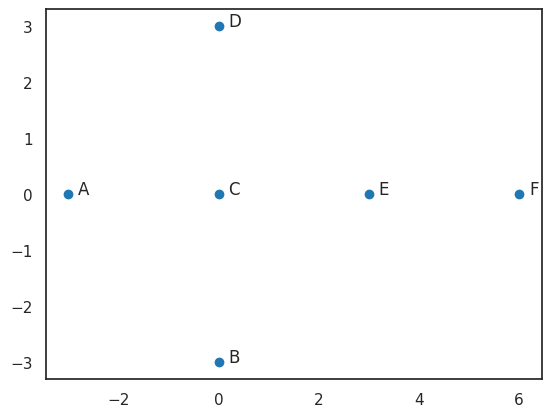

In [4]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'])
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

We apply the DBSCAN algorithm with:

eps=3
min_samples=4
Lets think about what should happen:

The point  𝐶
𝐶
  is the only point that has min_samples=4 or more points within a distance of eps=3.
This makes  𝐶
𝐶
  the only core point in the dataset.
Points  𝐴
𝐴
 ,  𝐵
𝐵
 ,  𝐷
𝐷
 , and  𝐸
𝐸
  are within eps=3 units from  𝐶
𝐶
 .
This means  𝐴
𝐴
 ,  𝐵
𝐵
 ,  𝐷
𝐷
 , and  𝐸
𝐸
  will be in the same cluster as  𝐶
𝐶
 .
Finally, point  𝐹
𝐹
  is not within eps=3 units of a core point
𝐹
𝐹
  will be labeled as noise.

In [5]:
cluster = DBSCAN(eps=3, min_samples=4)
cluster.fit(df)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 1 clusters and 1 points of noise.


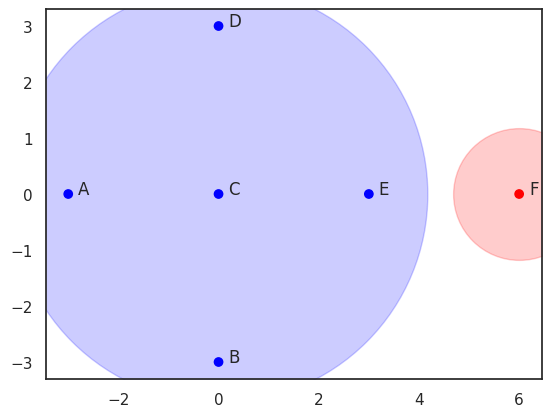

In [6]:

plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'], c=[['blue', 'red'][l] for l in cluster.labels_])
plt.scatter(0, 0, c='blue', alpha=0.2, s=90000)
plt.scatter(6, 0, c='red', alpha=0.2, s=9000)
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()


As expected, DBSCAN found one cluster (blue) and one point of noise (red).

Proving Someone Has Bad Handwriting
Let's say your friend has aweful handwriting. You (as a good friend) want to help out, but:

They will only work on their handwriting if you can prove their handwriting is bad.
One way to do this is to cluster readable handwriting from other people using DBSCAN.

The idea is: If your friend struggles to properly write a specific character, it will either:

Be marked as noise by DBSCAN.
Be grouped with a different kind of character
For example, if your friend wrote a "5" but it's grouped with "4"s, then it's probably not a very well-written 5.
Our pipeline will be as follows:

Load and Scale the data.
Apply TSNE algorithm.
To overly simplify, TSNE reduces the dimension of data such that similar data is closer together.
Apply DBSCAN algorithm.
Visualize our categorized data and show how dissimilar our friend's handwriting is.






First, we handwritten data we gathered from our friend's math assignment:

In [7]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv')
df.head()

0   1   2  3   4   5   6   7  8   9  ...  55  56  57  58  59  60  61  62  \
0  0   0   0  0  16  13  14  14  0   0  ...   0   0   0  11  15  14  14   0   
1  0  16  10  0   0   0   0   0  0   0  ...  14   0   0   0   0  -1   2  13   
2  0  12  14  6   5   3   0   0  0  16  ...   0   0  10  11   0   0   2  14   

   63  y  
0   0  0  
1   7  1  
2   8  2  

[3 rows x 65 columns]

Let's visualize our data using matplotlib,

We will need to reshape the data into 8x8 images, so matplotlib can properly display it:

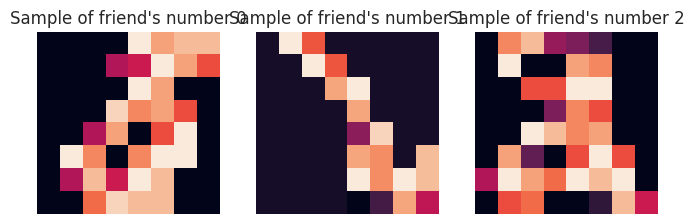

In [8]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy()
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in friend_digits)
c = 3
fig, ax = plt.subplots(1, c, sharex='col', sharey='row')
for j in range(c):
    ax[j].axis('off')
    ax[j].set_title(f'Sample of friend\'s number {j}')
    ax[j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [9]:
# Load the data
digits, y = load_digits(return_X_y=True)
pd.DataFrame(digits).head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

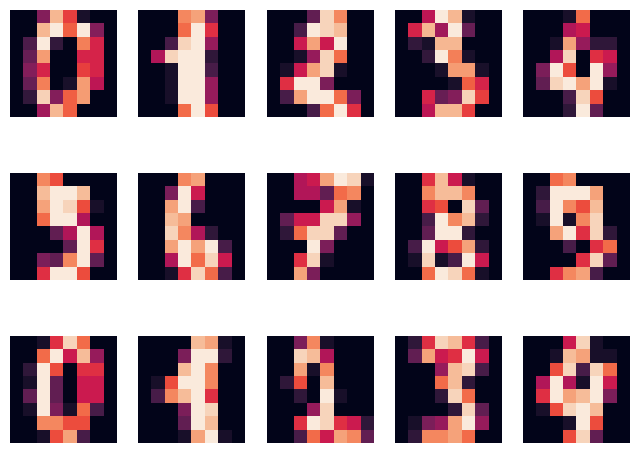

In [10]:
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in digits)
r, c = 3, 5
fig, ax = plt.subplots(r, c, sharex='col', sharey='row')
for i in range(r):
    for j in range(c):
        ax[i, j].axis('off')
        ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Next, we import the a dataset of digits from sklearn based on the MNIST dataset. This data contains handwritten numbers from hundreds individuals across the United States:

In [11]:
# Use np.r_ to concatenate two rows:
data = np.r_[digits, friend_digits]
y = np.r_[y, df['y']]

In [12]:
embedding = TSNE(n_components=2,
        init="pca",
        n_iter=500,
        n_iter_without_progress=150,
        perplexity=10,
        random_state=0)

In [13]:
e_data = embedding.fit_transform(data)

Our data after applying TSNE algorithm:

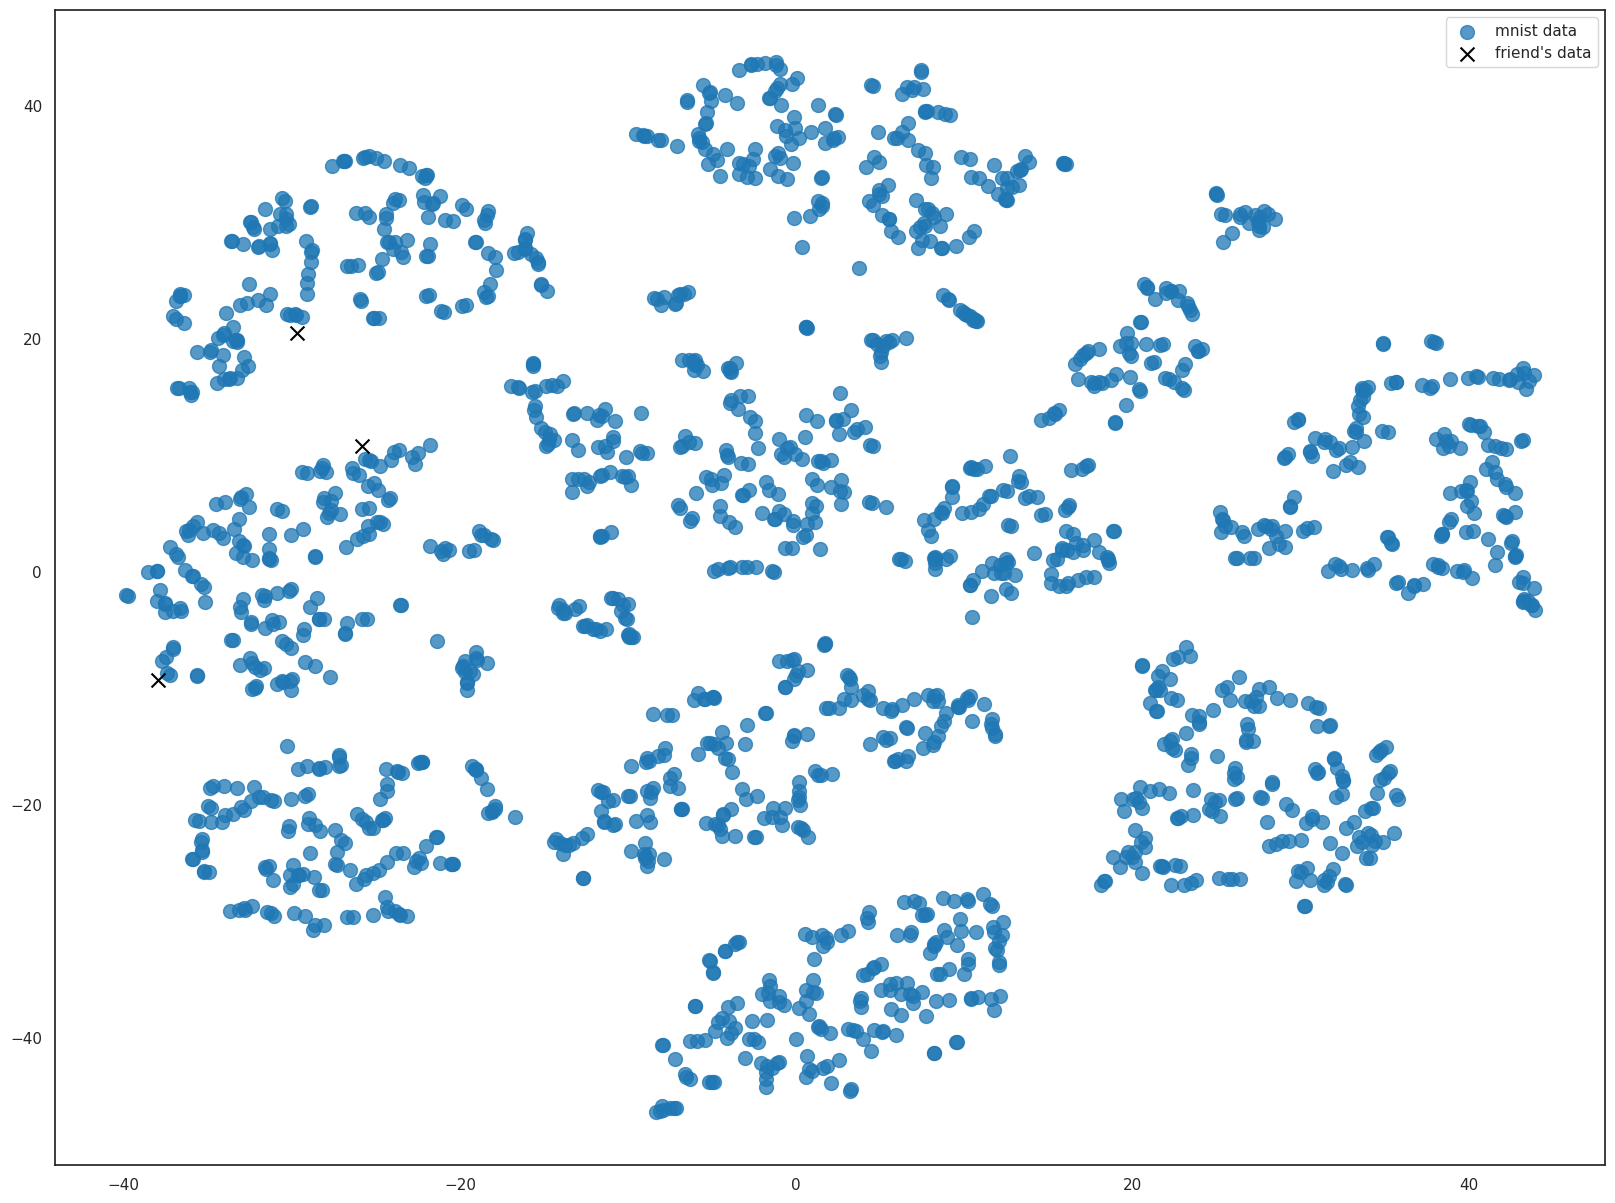

In [14]:
plt.rcParams['figure.figsize'] = (20,15)
n = friend_digits.shape[0]
plt.scatter(
    e_data[:-n, 0],
    e_data[:-n, 1],
    marker='o',
    alpha=0.75,
    label='mnist data',
    s=100)
plt.scatter(
    e_data[-n:, 0],
    e_data[-n:, 1],
    marker='x',
    color='black',
    label='friend\'s data',
    alpha=1,
    s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Next, we apply DBSCAN, using our chosen hyperparameters:

In [15]:
cluster = DBSCAN(eps=5, min_samples=20)
cluster.fit(e_data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 8 clusters and 24 points of noise.


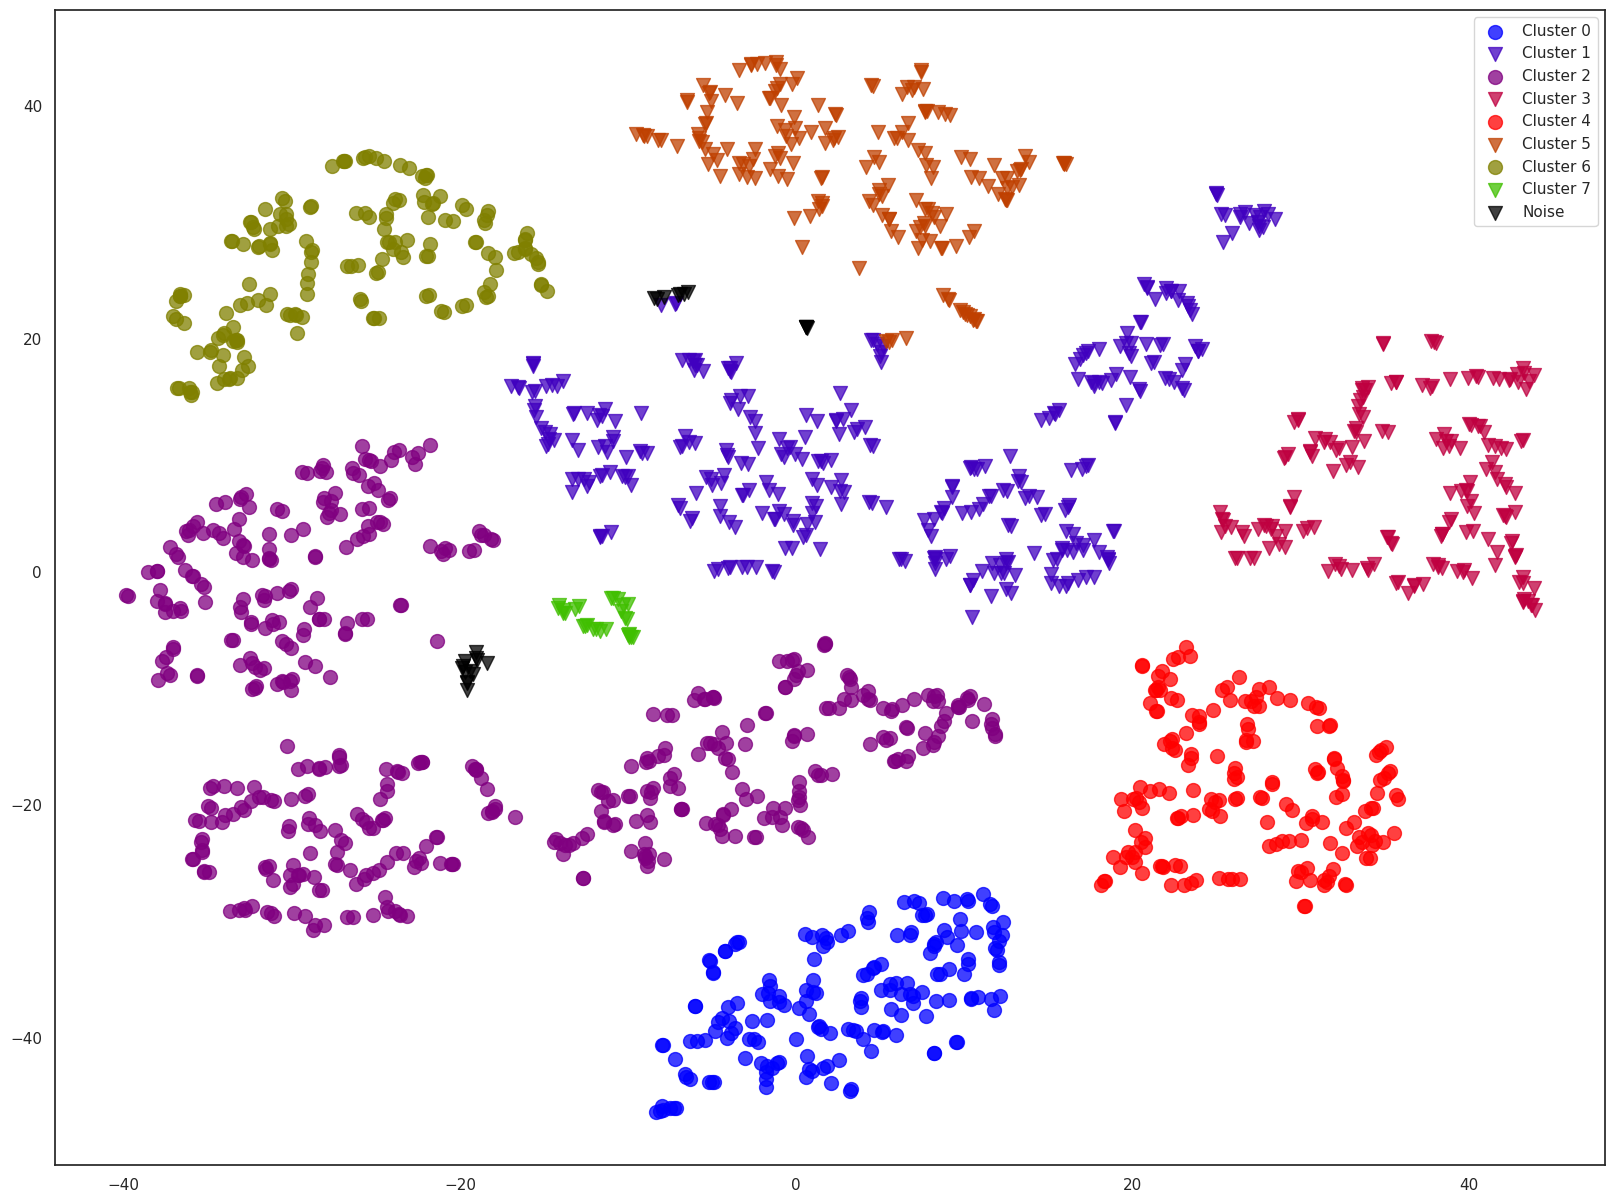

In [16]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[cluster.labels_ == l, 0],
        e_data[cluster.labels_ == l, 1],
        c=[cmap(l) if l >= 0 else 'Black'],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

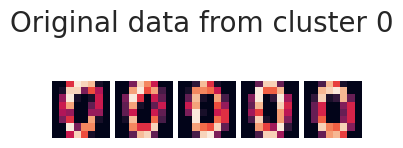

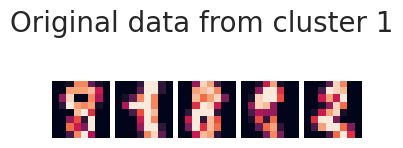

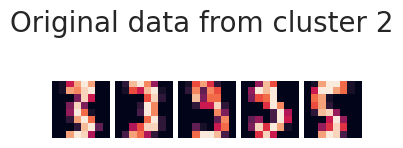

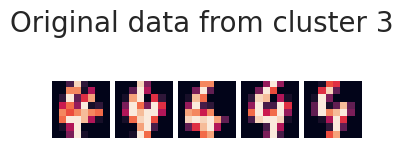

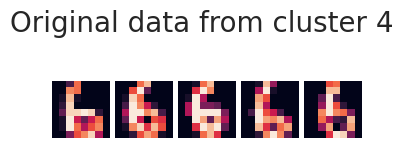

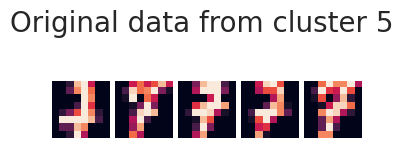

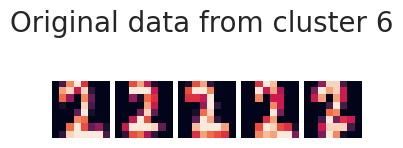

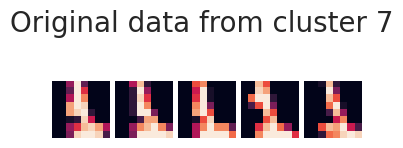

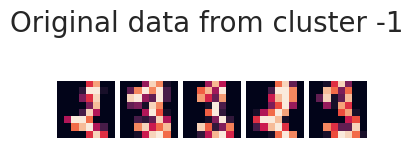

In [17]:
r, c = 1, 5
plt.rcParams['figure.figsize'] = (4*r,4*c)
for label in unique_labels:
    cluster_data = data[cluster.labels_ == label]
    nums = cluster_data[np.random.choice(len(cluster_data), r * c, replace=False)]
    it = (x.reshape(8, 8) for x in nums)
    fig, ax = plt.subplots(r, c)
    ax = ax.reshape(r, c)
    plt.subplots_adjust(wspace=0.1, hspace=-0.69)
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545)
    for i in range(r):
        for j in range(c):
            ax[i, j].axis('off')
            ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Correct labels:


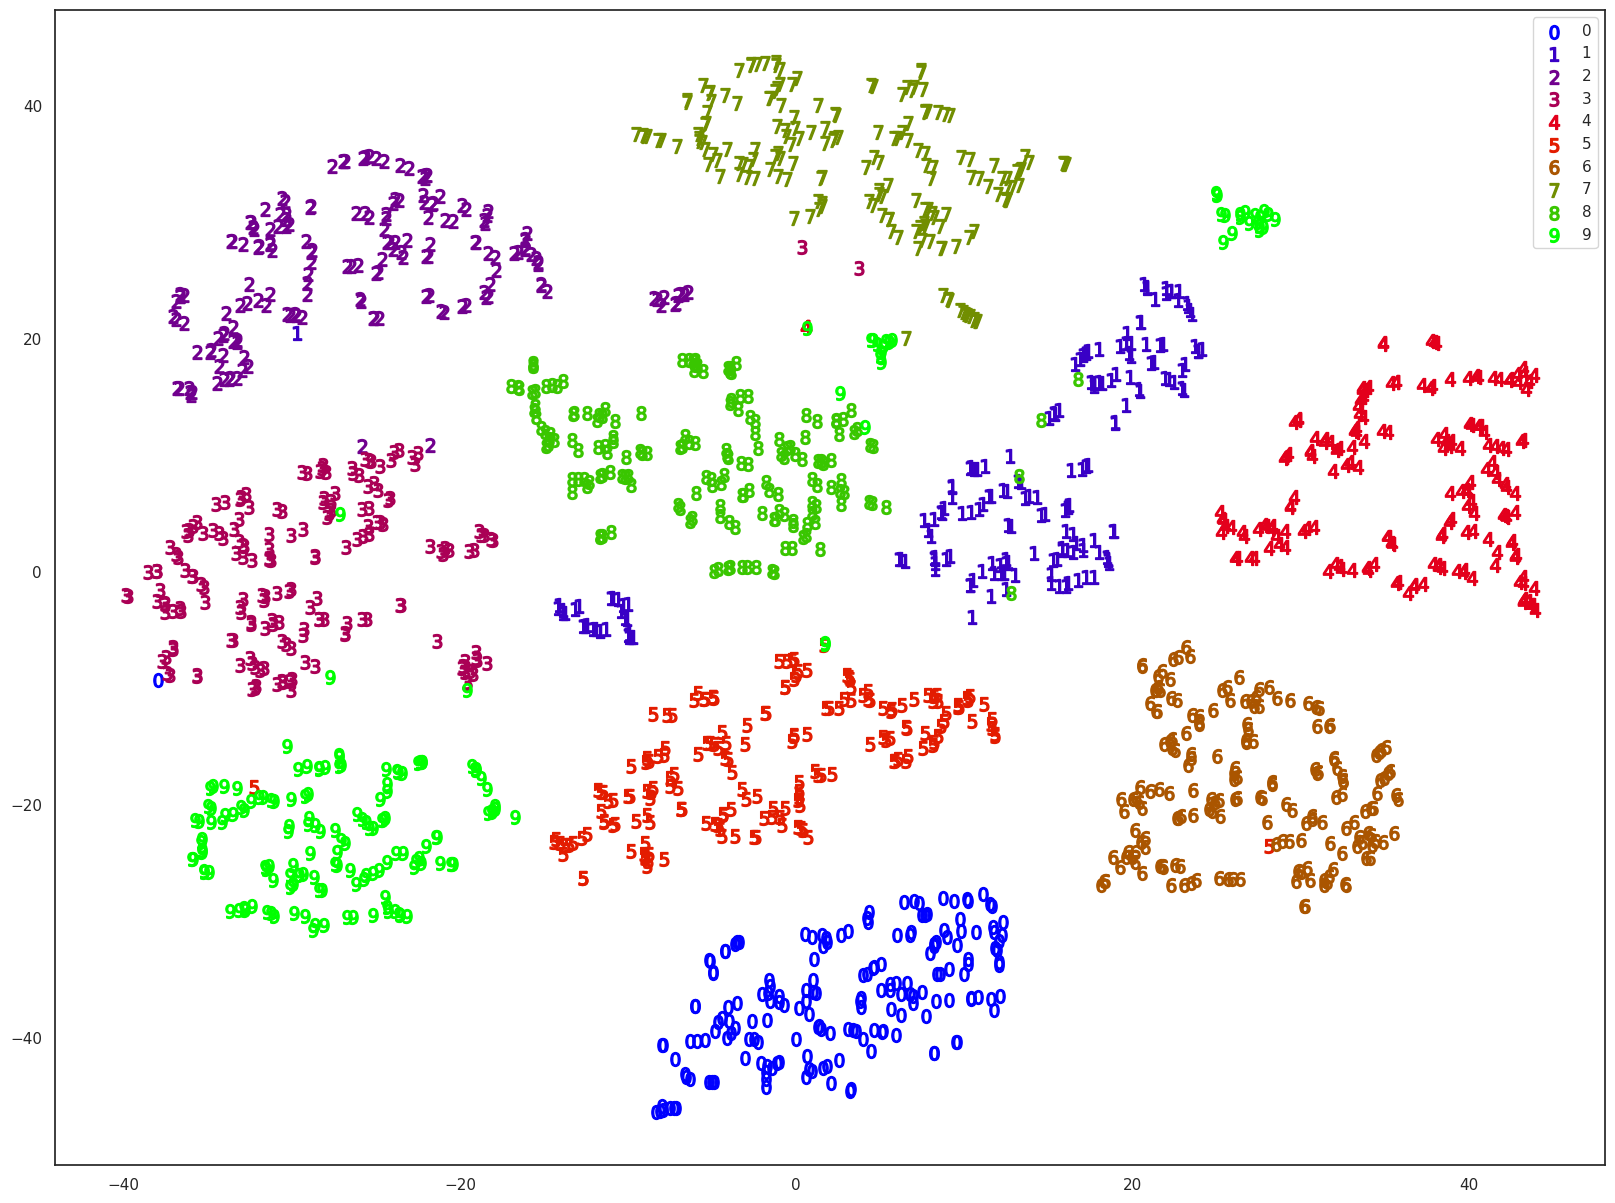

In [18]:
print('Correct labels:')
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(y)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[y == l, 0],
        e_data[y == l, 1],
        c=[cmap(l)],
        marker=f'${l}$',
        alpha=1,
        label=f'{l}',
        s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [19]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])):
    print('-' * 30)
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}')
    if l == -1:
        print('(IE: Noise)')
    else:
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True)
        mfreq = v[np.argmax(c)]
        ratio = c.max() / c.sum()
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')

    print(f'Your friend\'s {i}th sample is supposed to be the number {t}')

------------------------------
Your friend's 0th sample was categorized as being in cluster #2
Cluster 2 is 36.27% the number 5
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #6
Cluster 6 is 99.40% the number 2
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #2
Cluster 2 is 36.27% the number 5
Your friend's 2th sample is supposed to be the number 2


EXERCISE 1

In [20]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
df.head()

x          y
0  -4.792194  -9.720065
1  -0.102493  20.667312
2  -2.998773   7.034104
3  13.348503 -16.374098
4   6.827445  10.782092

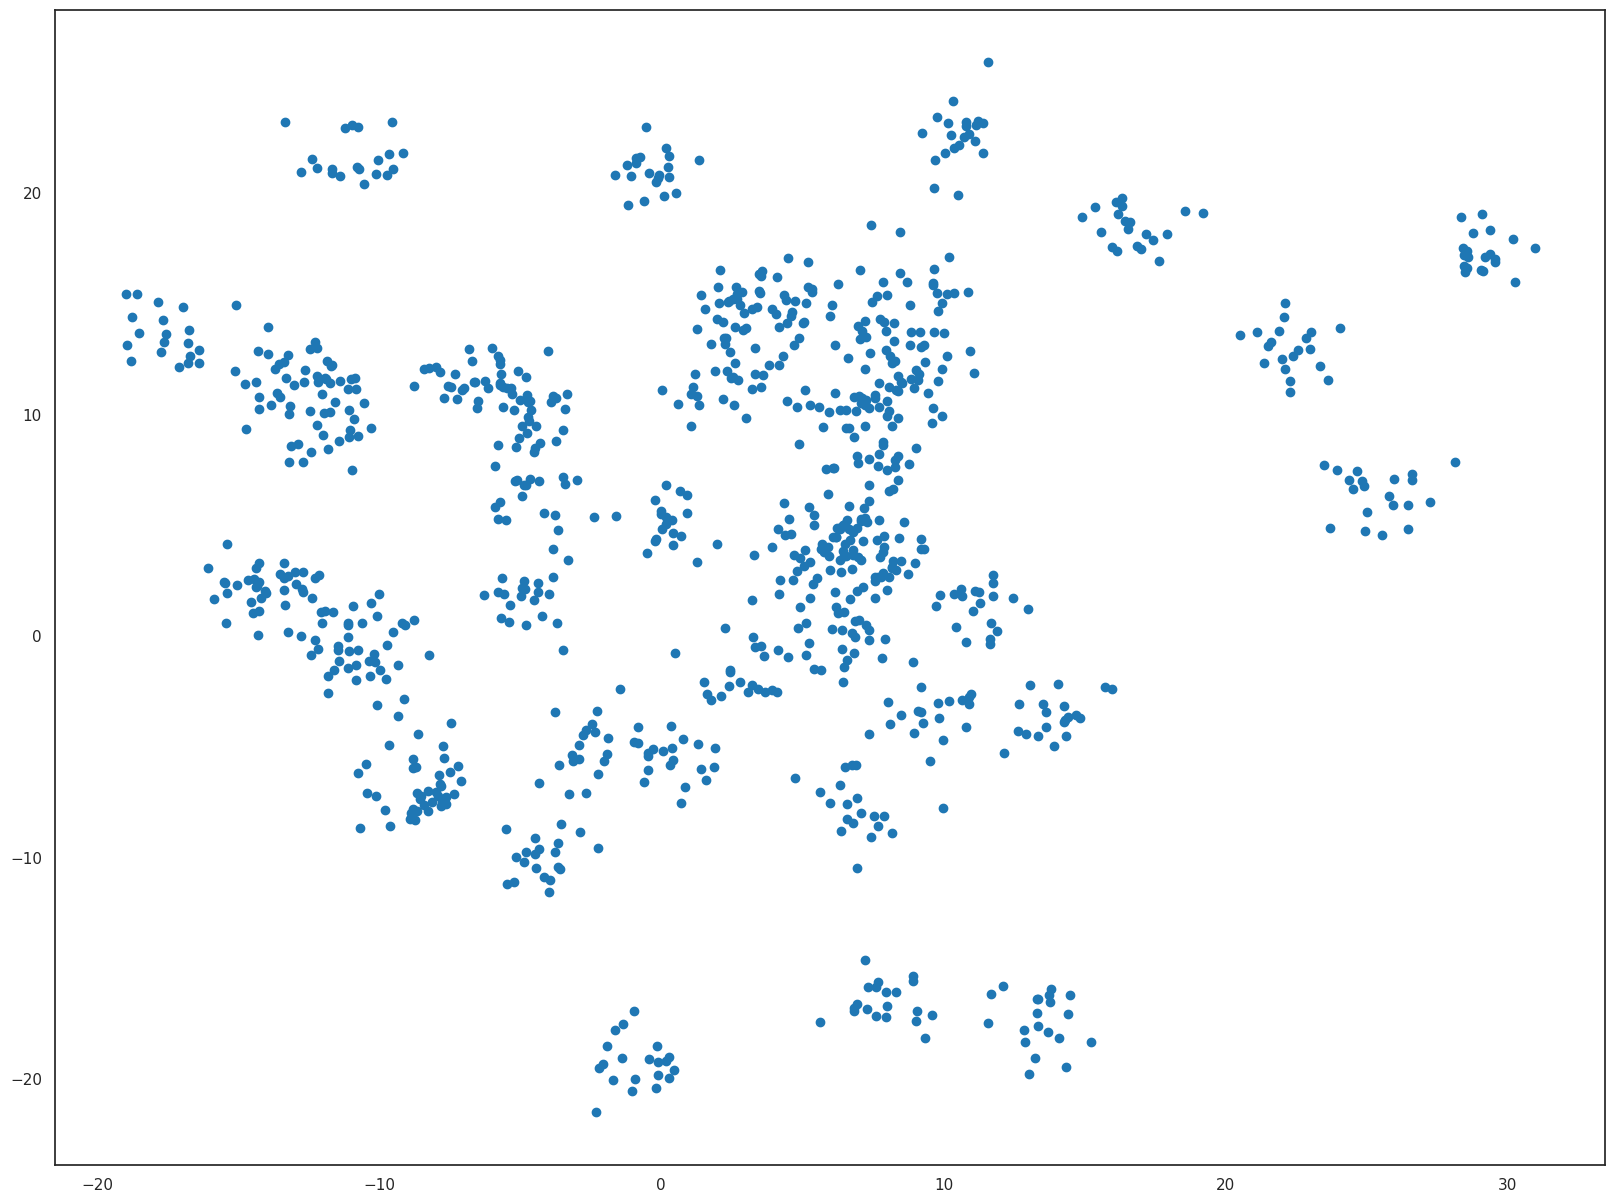

In [21]:
plt.scatter(df['x'], df['y'])
plt.show()

FIND NUMBER OF CLUSTERS

In [22]:
cluster = DBSCAN(eps=4, min_samples=4)
cluster.fit(df)
print(len(set(cluster.labels_) - {1}))

6


Exercise 2 - Find the % of data marked as noise

In [23]:
print(f'{100 * (cluster.labels_ == -1).sum() / len(cluster.labels_)}%')

0.0%


Exercise 3 - Visualize the clustered data using matplotlib.pyplot
It's very useful to visualize your clustered data when possible (i.e., when dimension is low enough);

Using matplotlib.pyplot, visualize the clustered data - where each cluster has its own assigned color.

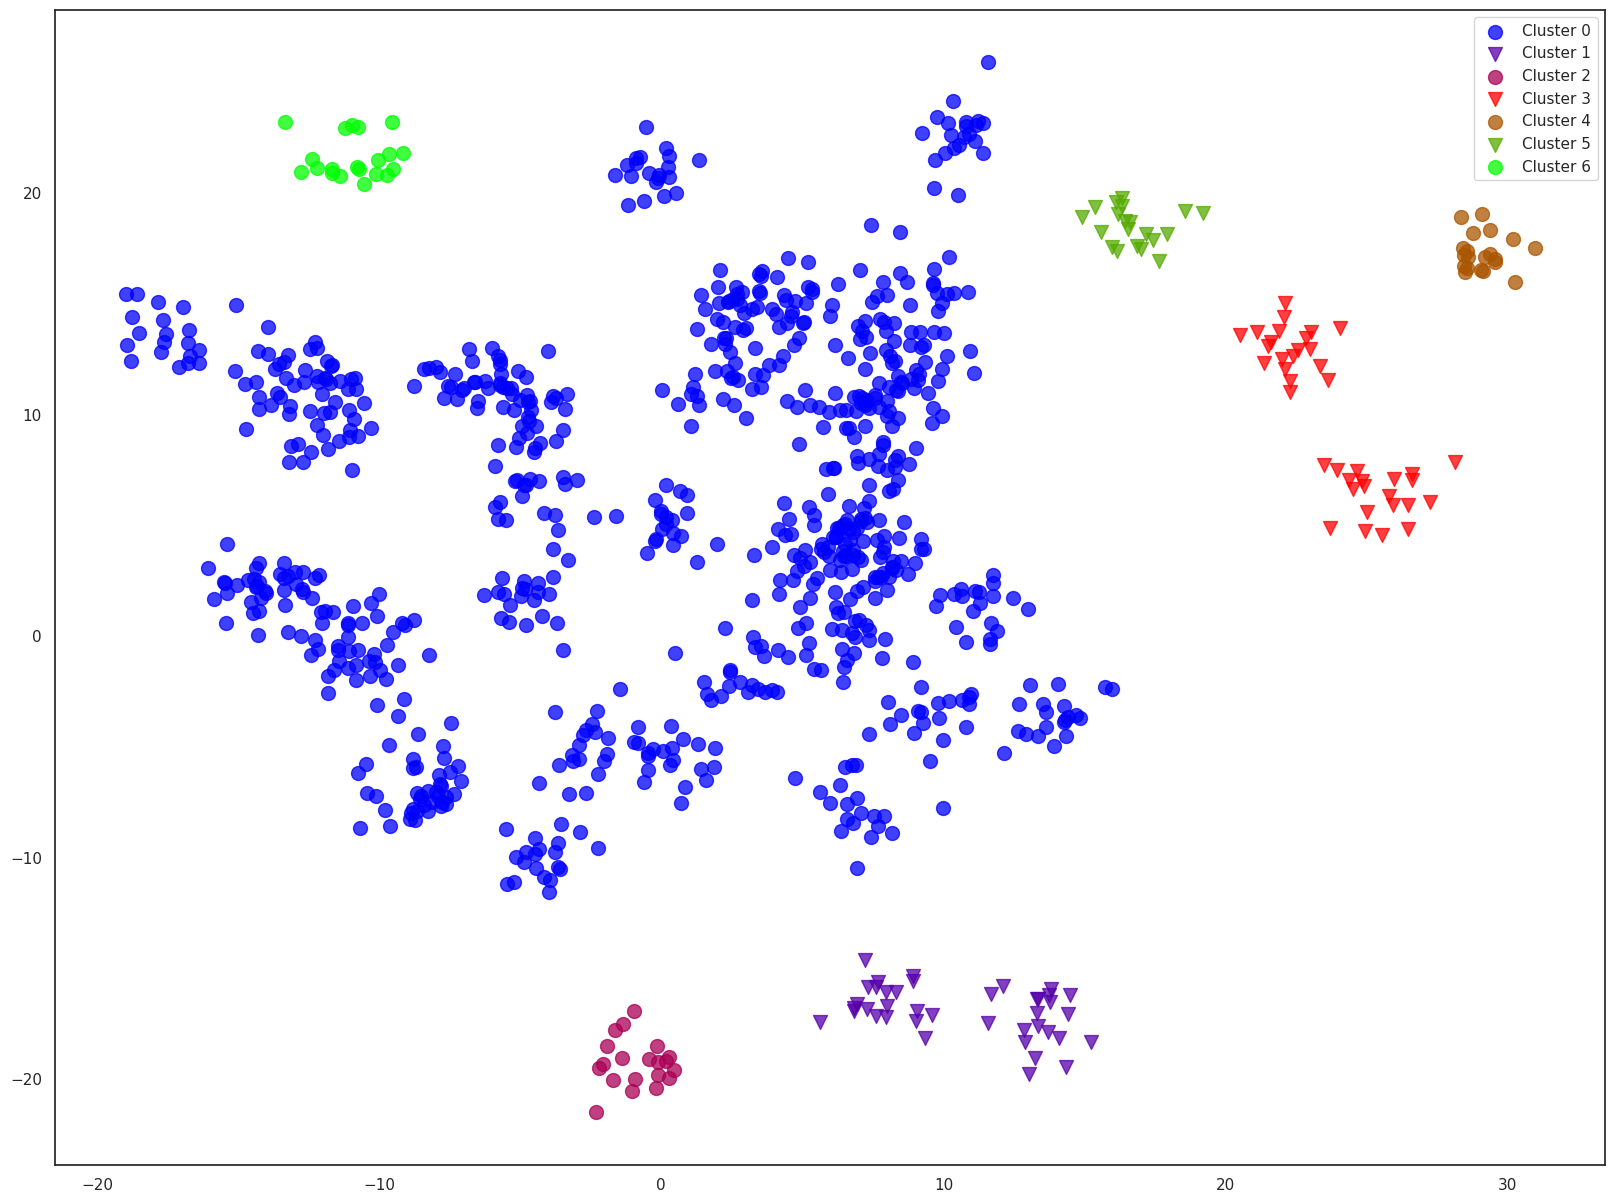

In [24]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        df['x'][cluster.labels_ == l],
        df['y'][cluster.labels_ == l],
        c=[cmap(l)],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Mean Shift Clustering

Mean Shift Clustering
Estimated time needed: 30 minutes

As you hike in the mountains, you stumble upon a plant you have never seen before. You look around and you spot a few more of them. The similarities between them tell you that they probably belong to the same group of plants. However, you are not a botanist, so you can't know exactly which species these plants belong to. This task can be solved with the help of clustering analysis. Clustering can identify the groups of similar looking objects and group them together based on their similar instances.


Image from PxHere

In this notebook, we will explore Mean Shift Clustering, which is a non-parametric centroid-based clustering algorithm. Mean Shift Clustering attempts to group data without having first to be trained on the labeled data. Unlike the K-Means Clustering, when using the Mean Shift, we don't need to specify the number of clusters beforehand. Mean Shift Clustering is used in a wide variety of applications, such as image segmentation, academic ranking systems, search engines, medicine, and many others.

In the first part of this notebook, we will focus on the image segmentation, which is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

In the second part of this notebook, we will show how to use the Mean Shift Clustering to classify the survivors rates of the Titanic, the most famous shipwreck in history. Based on the passengers' features (e.g. age, ticket class, fare, etc.) we will classify the passengers into clusters with different survival probabilities.

Table of Contents
Objectives
Setup
Installing Required Libraries
Importing Required Libraries
Mean Shift for Image Segmentation
Pre-processing Image
Apply Mean Shift to the Image
Exercises
Exercise 1 - Repeat the above image segmentation process for a new image on the internet
Exercise 2 - Mean Shift Applied to the Titanic Dataset
How Mean Shift Works (Optional)
Kernel Density Estimation
Mean Shift From Scratch
Objectives
After completing this lab you will be able to:

Understand Kernel Density Estimation (KDE).
Describe how Mean Shift Works from scratch.
Implement Mean Shift for image segmentation.
Setup
For this lab, we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.
sklearn for machine learning and machine-learning-pipeline related functions.
openCV OpenCV provides a real-time optimized Computer Vision library, tools, and hardware.
matplotlib for additional plotting tools.

Installing Required Libraries
The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the # sign before !mamba in the code cell below.

In [25]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3"

In [26]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

If you wish to learn in detail about how Mean Shift works before studying its applications, you can go to How Mean Shift Works (Optional) section first.

Mean Shift for Image Segmentation
Pre-processing Image
Mean Shift Clustering can be used for image segmentation. An image segmentation attempts to cluster an image pixels according to their color. It then replaces each pixel's color with the mean color of its cluster. This way considerably reduces the number of different colors in the image. So, each cluster represents the mode or the most common intensities. Every pixel is labeled according to the cluster it’s nearest to. Consider the following image.

Download the image:

In [28]:
!wget -O peppers.jpeg https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg


--2025-03-01 03:47:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6911 (6.7K) [image/jpeg]
Saving to: ‘peppers.jpeg’

peppers.jpeg        100%[===================>]   6.75K  --.-KB/s    in 0s      

2025-03-01 03:47:02 (2.12 GB/s) - ‘peppers.jpeg’ saved [6911/6911]



In [29]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/peppers.jpeg"
response = requests.get(url)

# Save the image
with open("peppers.jpeg", "wb") as file:
    file.write(response.content)

print("Download complete: peppers.jpeg")


Download complete: peppers.jpeg


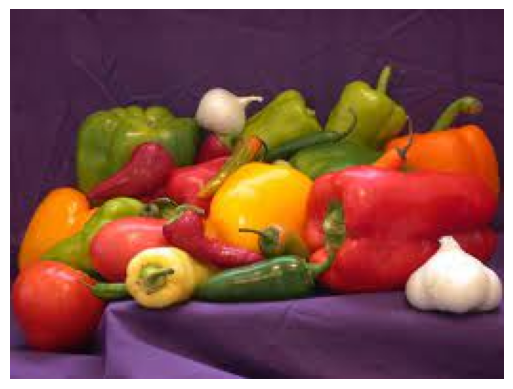

In [30]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("peppers.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

plt.imshow(img)
plt.axis("off")
plt.show()


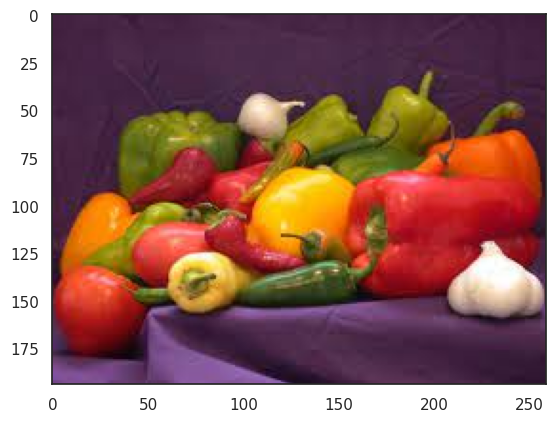

In [31]:
img = cv.imread('peppers.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

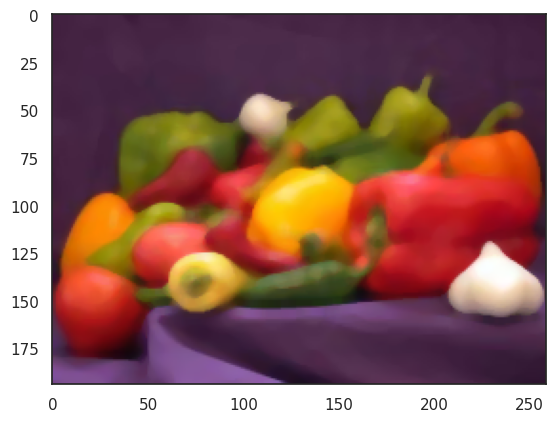

In [32]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

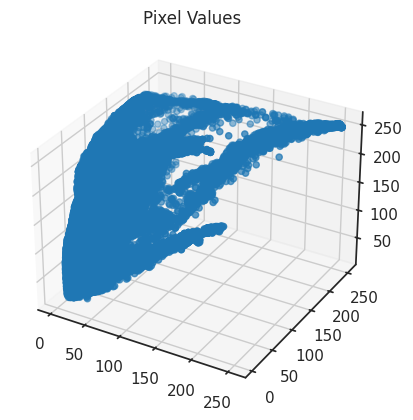

In [33]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

In [34]:
img.shape

(194, 259, 3)

In [35]:
X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (50246, 3)
data type   :  uint8


In [36]:
X = np.float32(X)

Apply Mean Shift to the Image¶






Estimate the bandwidth to use with the mean-shift algorithm, using the estimate_bandwidth function:

X: array-like of shape (n_samples, n_features) Input points.
quantile: float, default=0.3 Should be between [0, 1], 0.5 means that the median of all pairwise distances is used.
n_samples: int, The number of samples to be used. If not given, all samples are to be used.

In [37]:
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth

33.51403269933768

andwidth






We can create a MeanShift object in sklearn with the following parameters:

bandwidth:float, default=None Bandwidth used in the RBF kernel.
max_itert: (default=300) Maximum number of iterations per seed point before the clustering operation terminates (for that seed point), if has not converged yet.
bin_seeding :if true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points.
We then fit the model.

In [38]:
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=33.51403269933768, bin_seeding=True)

In [39]:
labeled=ms.labels_
labeled

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
clusters=ms.predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
np.unique(labeled)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

We can also list the actual cluster centroid locations, which are also the RGB values:

In [42]:
ms.cluster_centers_

array([[ 67.19606 ,  37.927944,  70.074814],
       [ 32.38643 ,  29.431494, 173.7524  ],
       [ 25.335648,  94.10284 ,  98.0142  ],
       [ 25.08942 , 130.47505 , 141.56128 ],
       [127.69194 ,  73.29858 , 115.98683 ],
       [ 14.098269,  95.66574 , 230.2173  ],
       [  9.878764, 132.11331 , 245.06735 ],
       [  8.750482, 182.74567 , 251.81984 ],
       [158.78459 , 185.80435 , 217.75691 ],
       [191.184   , 215.884   , 241.426   ],
       [240.2958  , 246.98953 , 251.78273 ],
       [ 88.08382 , 214.68497 , 249.59248 ]], dtype=float32)

We can convert the clusters unit8 datatype for images:

In [43]:
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 67,  37,  70],
       [ 32,  29, 173],
       [ 25,  94,  98],
       [ 25, 130, 141],
       [127,  73, 115],
       [ 14,  95, 230],
       [  9, 132, 245],
       [  8, 182, 251],
       [158, 185, 217],
       [191, 215, 241],
       [240, 246, 251],
       [ 88, 214, 249]], dtype=uint8)

We can also estimate what cluster each sample belongs to, as follows:

In [44]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

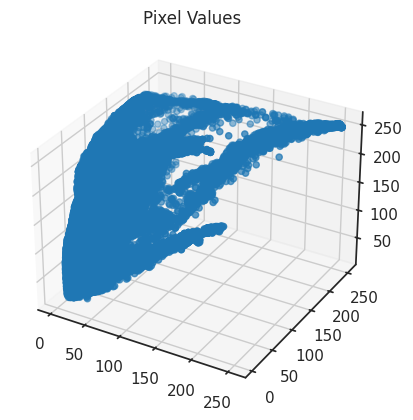

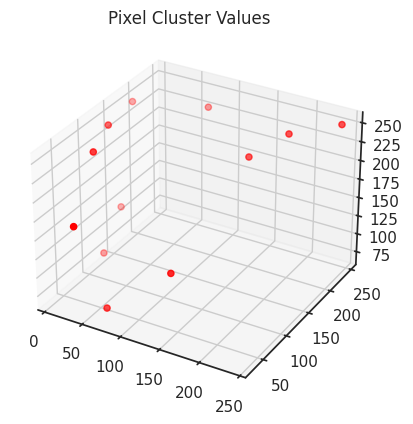

In [45]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

We can assign each data point to the cluster value and reshape it back to a Rectangular image.

In [46]:
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]


result=result.reshape(img.shape)

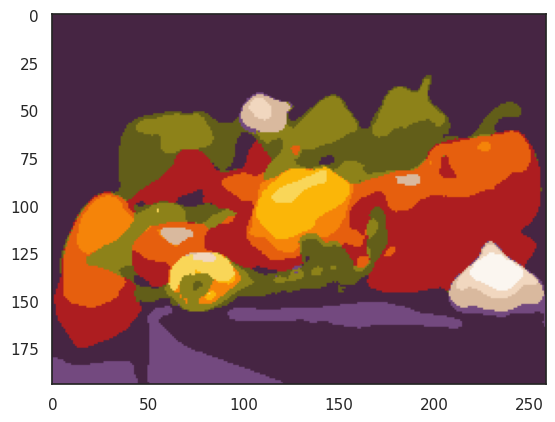

In [47]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

We now plot each cluster, as a cluster value, and we see that each cluster corresponds to a different object.

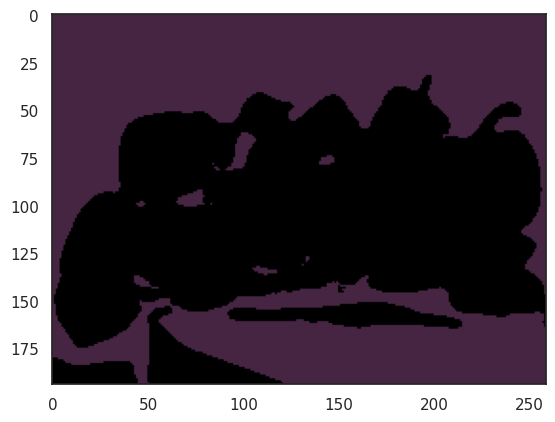

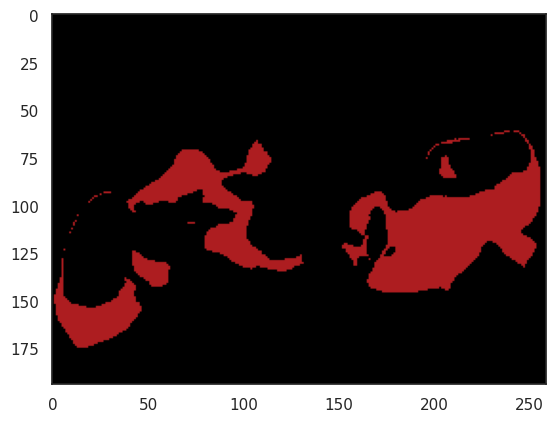

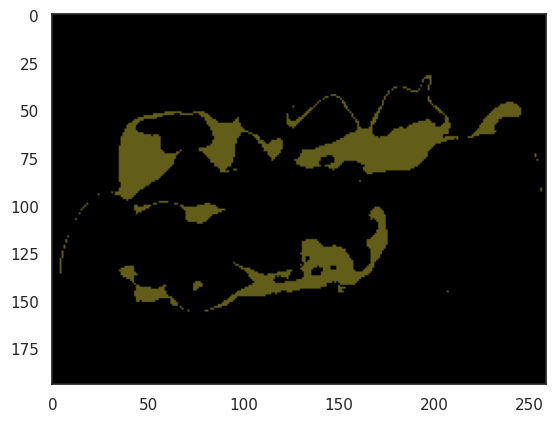

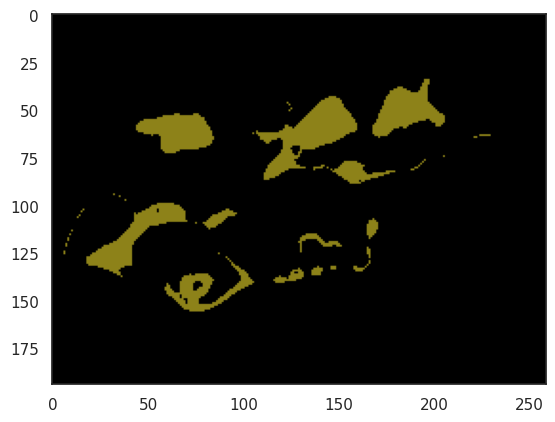

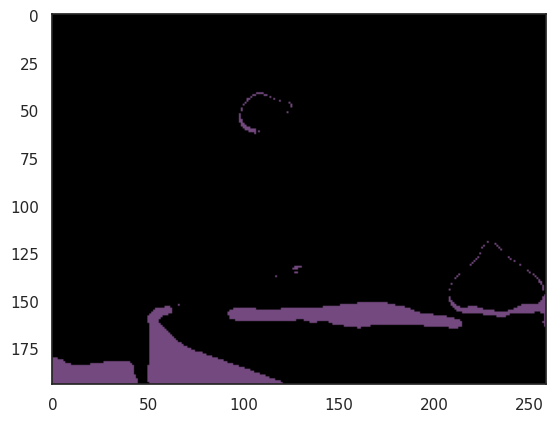

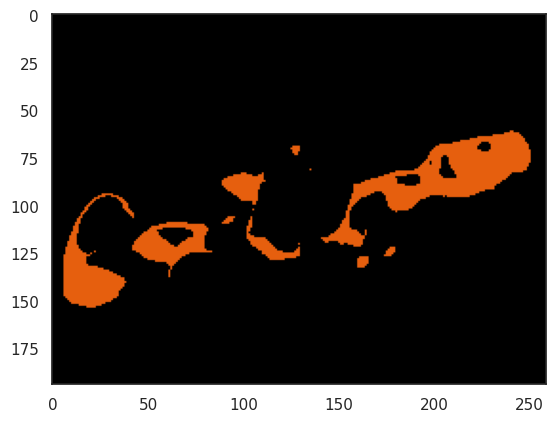

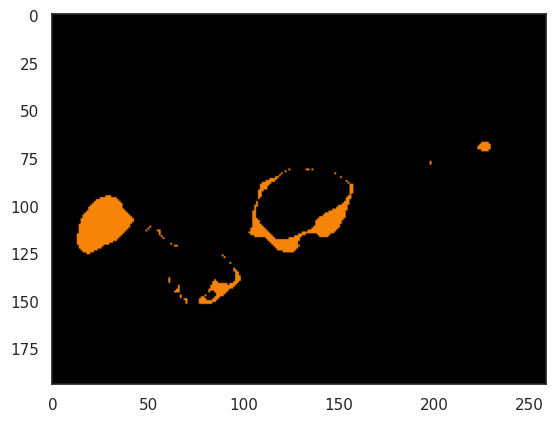

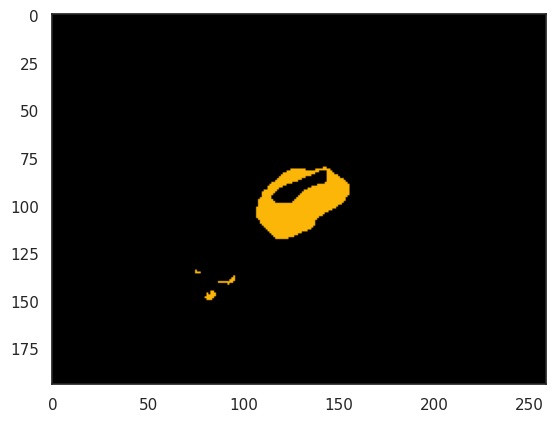

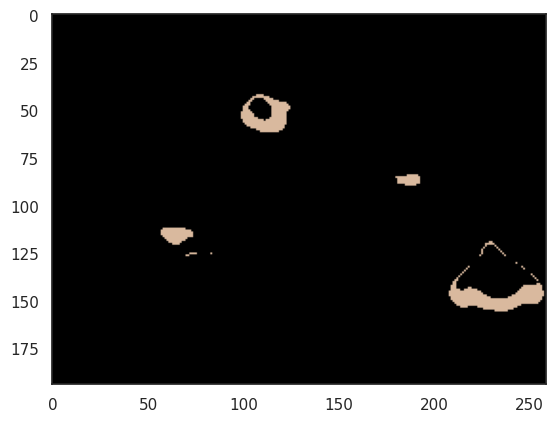

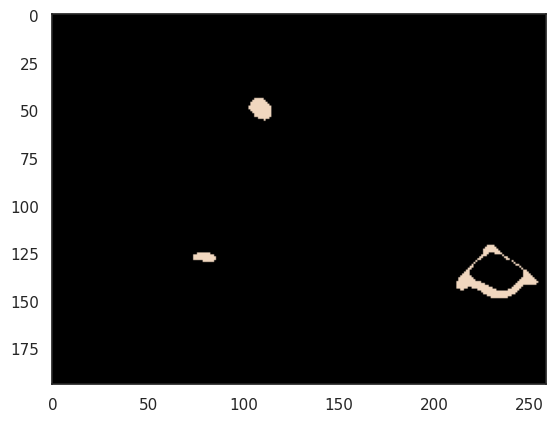

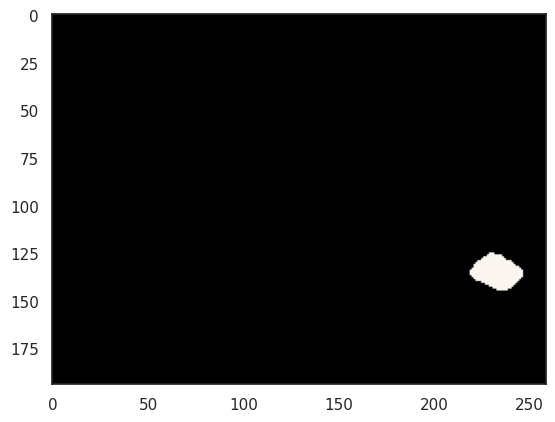

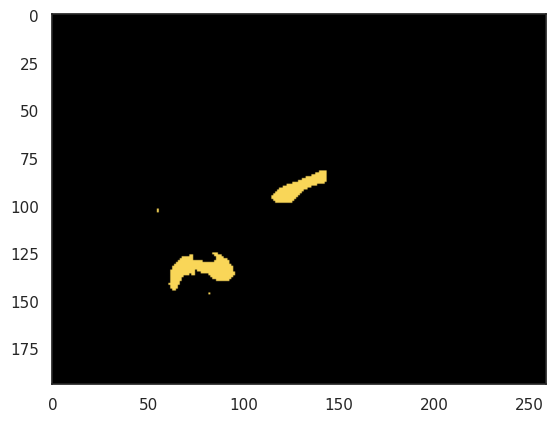

In [48]:
for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

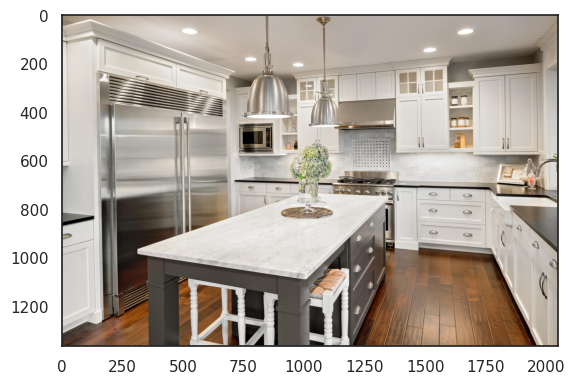

In [49]:
#EXCRISE 1
import requests
url='https://www.plastform.ca/wp-content/themes/plastform/images/slider-image-2.jpg'
name="my_file.jpg"

with open(name, 'wb') as file:
    file.write(requests.get(url, stream=True).content)

img = cv.imread(name)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

Now it's your turn to play around with the **MeanShift** algorithm.

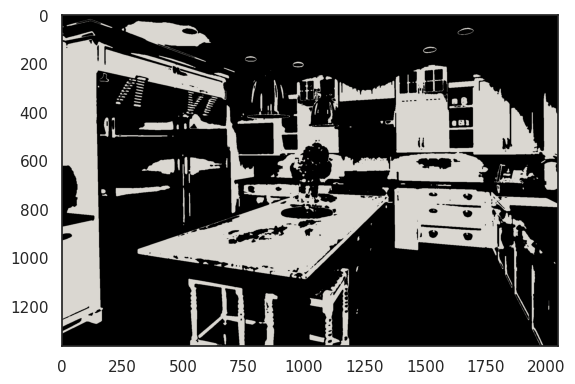

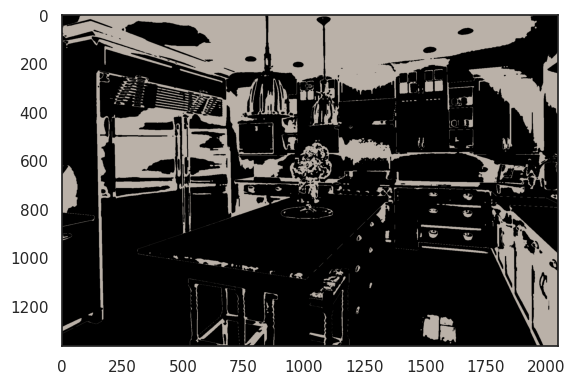

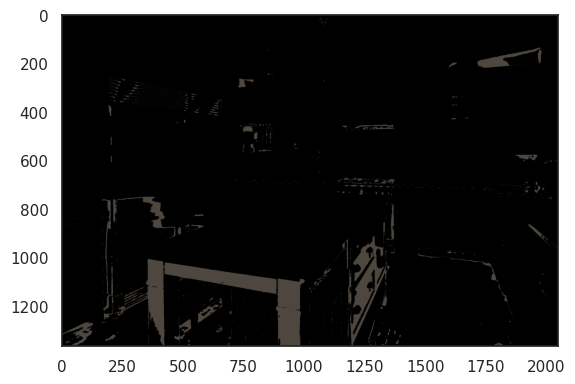

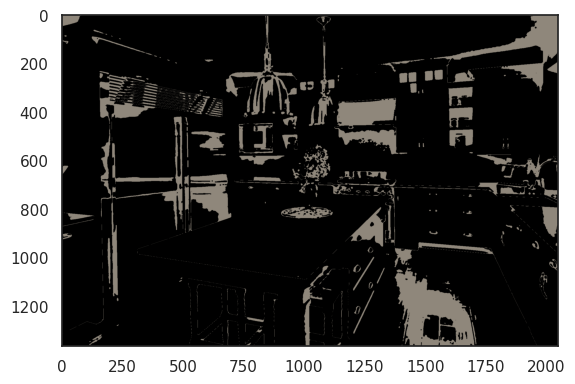

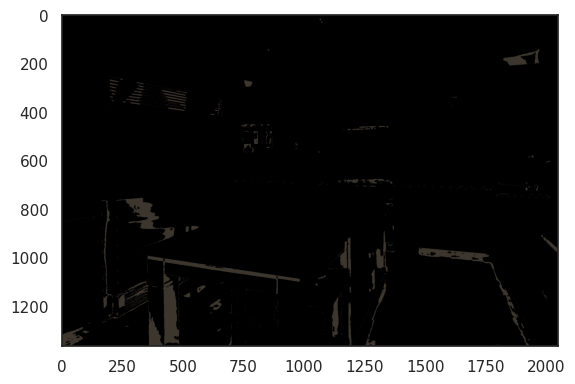

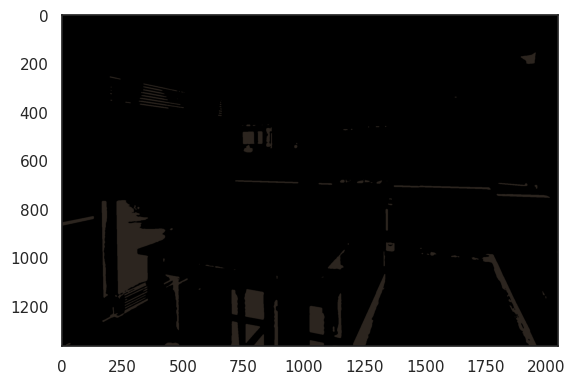

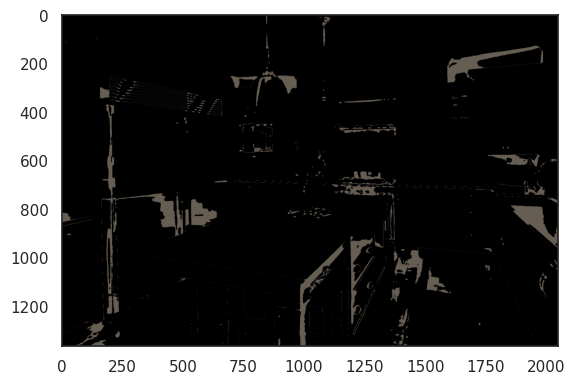

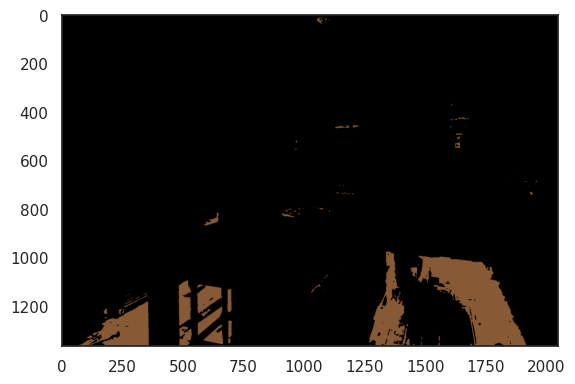

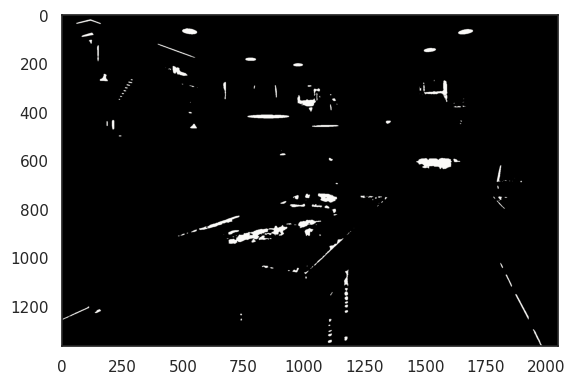

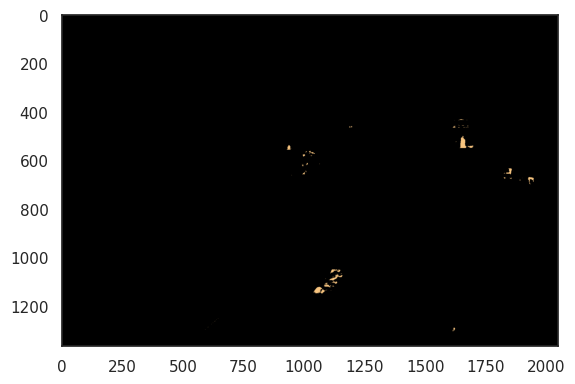

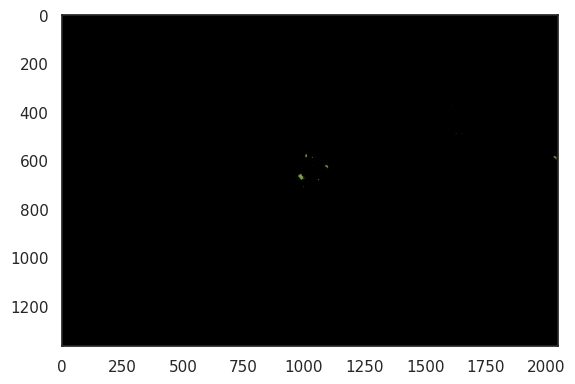

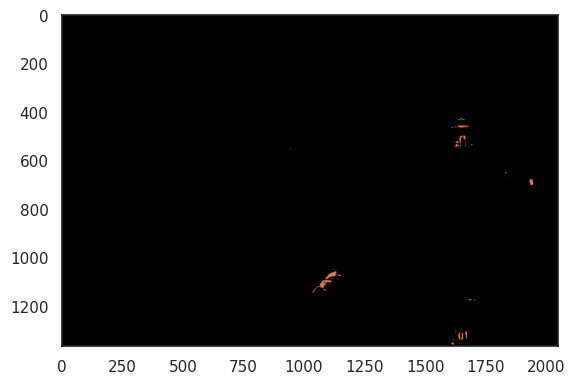

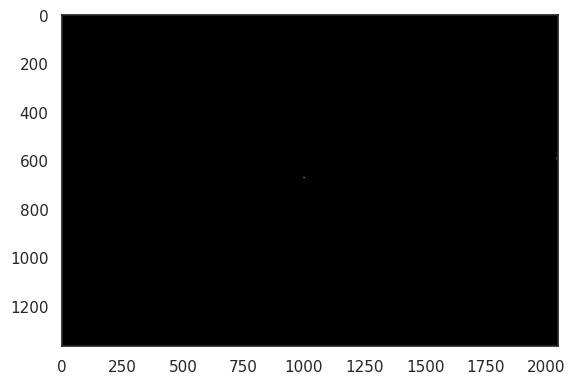

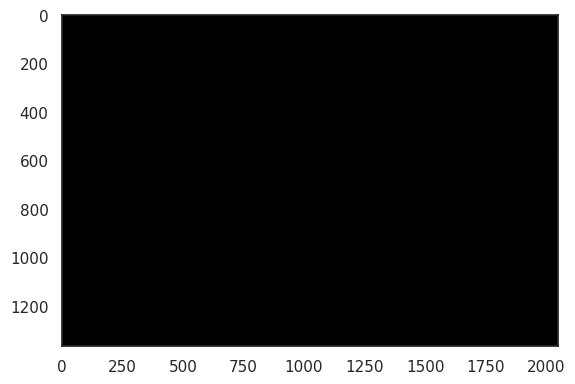

In [50]:
img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
X = img.reshape((-1,3))
X = np.float32(X)
bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)
labeled=ms.labels_
cluster_int8=np.uint8(ms.cluster_centers_)
result=np.zeros(X.shape,dtype=np.uint8)
labeled=ms.labels_
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]

    cluster_int8[label]
result=result.reshape(img.shape)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

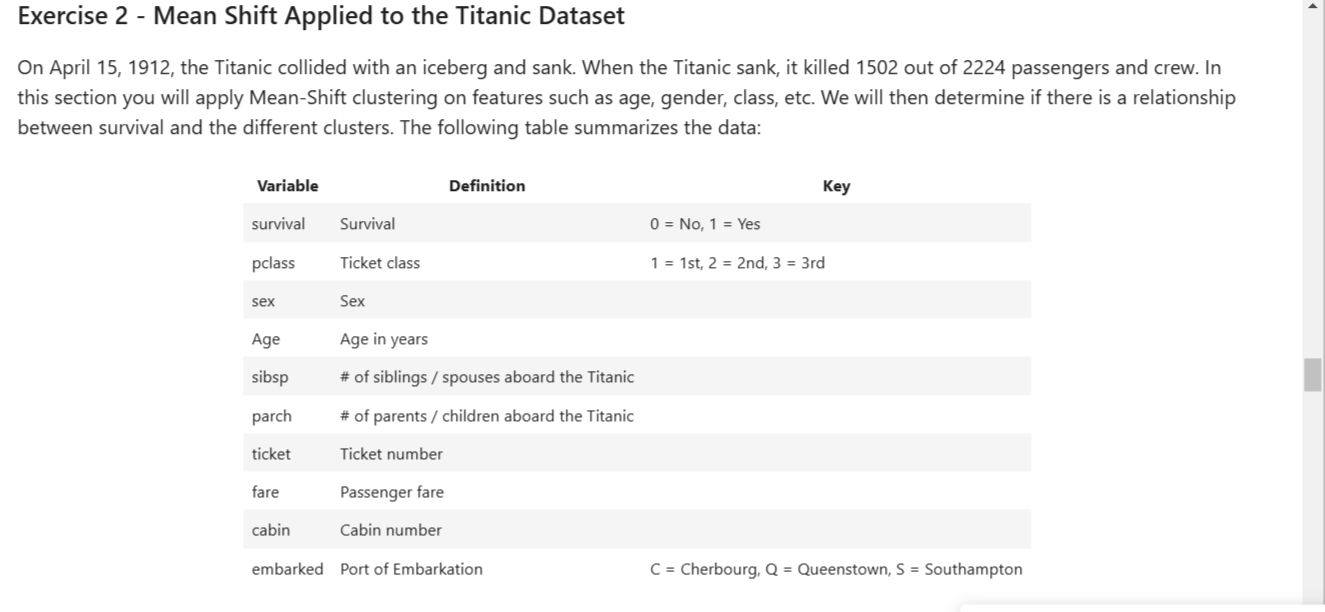

DATA PREPROCESSING

In [52]:
import pandas as pd

# Download the dataset
!wget -O titanic.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv

# Load the dataset
df = pd.read_csv("titanic.csv")

# Display the first 5 rows
df.head()


--2025-03-01 04:02:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/titanic.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K   319KB/s    in 0.2s    

2025-03-01 04:02:53 (319 KB/s) - ‘titanic.csv’ saved [60302/60302]



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

We can drop the following columns 'Name','Ticket','Cabin','PassengerId','Embarked'  for simplicity.

In [53]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId','Embarked'])

We will assign "0" to "female" sex, and "1" to "male" sex, known as feature binarization

In [54]:
df.loc[df['Sex']!='male','Sex']=0
df.loc[df['Sex']=='male','Sex']=1

In [55]:
df.head()

Survived  Pclass Sex   Age  SibSp  Parch     Fare
0         0       3   1  22.0      1      0   7.2500
1         1       1   0  38.0      1      0  71.2833
2         1       3   0  26.0      0      0   7.9250
3         1       1   0  35.0      1      0  53.1000
4         0       3   1  35.0      0      0   8.0500

In [56]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [58]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [59]:
X=df.drop(columns=['Survived'])

In [60]:
X=df.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)

In [61]:
X.head()

Survived    Pclass       Sex       Age     SibSp     Parch      Fare
0 -0.788829  0.826913  0.737281 -0.592148  0.432550 -0.473408 -0.502163
1  1.266278 -1.565228 -1.354812  0.638430  0.432550 -0.473408  0.786404
2  1.266278  0.826913 -1.354812 -0.284503 -0.474279 -0.473408 -0.488580
3  1.266278 -1.565228 -1.354812  0.407697  0.432550 -0.473408  0.420494
4 -0.788829  0.826913  0.737281  0.407697 -0.474279 -0.473408 -0.486064

Apply the mean-shift to Titanic data frame X:
To apply the mean-shift algorithm to X, first use the estimate_bandwidth function to estimate the value for the bandwidth parameter. Then create a MeanShift object and fit it to X:

In [62]:
bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=2.6395838673142618, bin_seeding=True)

In [63]:
X['cluster']=ms.labels_
df['cluster']=ms.labels_

In [64]:
df.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)

Survived    Pclass       Sex        Age     SibSp     Parch  \
cluster                                                                
5        1.000000  1.000000  0.666667  35.333333  0.000000  0.333333   
4        0.750000  1.000000  0.285714  27.822048  0.857143  1.250000   
0        0.381313  2.313131  0.676768  30.734477  0.285354  0.199495   
3        0.307692  2.846154  0.153846  38.692308  0.769231  4.230769   
1        0.260870  2.913043       0.5   8.745575  3.239130  1.543478   
2        0.000000  3.000000  0.571429  29.699118  8.000000  2.000000   
6        0.000000  1.000000       1.0  61.000000  0.500000  3.000000   

               Fare  
cluster              
5        512.329200  
4        195.894643  
0         23.992865  
3         29.377562  
1         30.968026  
2         69.550000  
6        188.137500

From the table above, we see that there are 7 clusters generated by the mean-shift analysis, each cluster contains the average percentage of survivors.

For instance, cluster 5, has 100 % of survivors, with the average age of 35.3, passengers belonging to the 1st class, and the passengers who paid the highest fare, 512.33 per ticket. Interestingly, Cluster 6, has 0 % of survivors, with the average age of 61, also belonging to the 1st class and in the mid-range ticket fare. It is not surprising that the highest odds for survival were held by the younger and richer groups of passengers.

How Mean Shift Works (Optional)
Mean Shift algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean. Next, it iterates this mean-shifting step until all the circles stop moving (i.e., until each of them is centered on the mean of the instances it contains). Mean Shift shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster.

In the following section, we will review Kernel Density Estimation, then we will derive the Mean Shift vector, and show how it finds the maximum values of the distribution. This section is optional and you can skip it and go to the next sections, where we apply the Mean Shift algorithm to the real data.

Kernel Density Estimation
Let's say we have  {𝒙1,..,𝒙𝑛}
{
𝑥
1
,
.
.
,
𝑥
𝑛
}
  D dimensional samples, it can be difficult to calculate the histogram for density estimation, but we can represent the density using Kernel Density Estimation (KDE). The Kernel is a Function of  𝒙
𝑥
  and the sample  𝒙𝑖
𝑥
𝑖
 , for example, the Gaussian kernel of the  𝑖−𝑡ℎ
𝑖
−
𝑡
ℎ
  sample is given by:

𝐾ℎ(𝒙−𝒙𝑖)=12𝜋ℎ√𝐷𝑒−|𝒙−𝒙𝑖|22ℎ2
𝐾
ℎ
(
𝑥
−
𝑥
𝑖
)
=
1
2
𝜋
ℎ
𝐷
𝑒
−
|
𝑥
−
𝑥
𝑖
|
2
2
ℎ
2


ℎ
ℎ
  is a bandwidth parameter and it is a free parameter, we can code the kernel in Python as a function of the distance  |𝒙−𝒙𝑖|2
|
𝑥
−
𝑥
𝑖
|
2
  and  ℎ
ℎ
  :

In [65]:
def gaussian(d, h):
    return np.exp(-0.5*((d/h))**2) / (h*math.sqrt(2*math.pi))

There are many types of kernels, we chose the Gaussian Kernel for simplicity.

We can calculate the Kernel function for  𝑥1=1
𝑥
1
=
1
 , which we will refer to as sample s,  𝑥
𝑥
  will be in the range between  −2<𝑥<4
−
2
<
𝑥
<
4
 . We will try it for  ℎ=1
ℎ
=
1
  and  ℎ=3
ℎ
=
3
 .

In [66]:
s=1 # a sample point

x = np.linspace(-2, 4, num=200)
dist=np.sqrt(((x-s)**2))
kernel_1=gaussian(dist, 1)
kernel_2=gaussian(dist, 3)

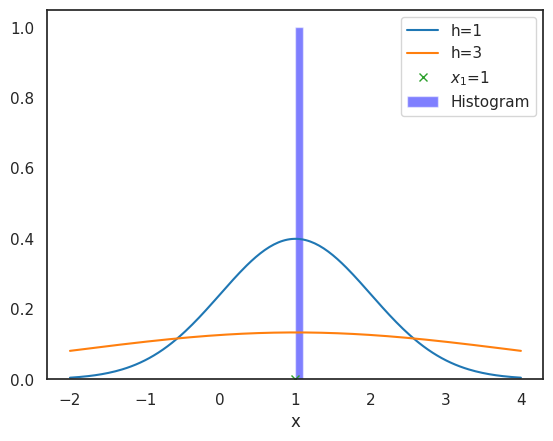

In [67]:
plt.plot(x,kernel_1,label='h=1')
plt.plot(x,kernel_2,label='h=3')
plt.plot(s,0,'x',label="$x_{1}$=1")
plt.hist(s, 10, facecolor='blue', alpha=0.5,label="Histogram")
plt.xlabel('x')
plt.legend()
plt.show()

We see that for x close to our sample point ( 𝑥1
𝑥
1
  = 1), the gaussian kernel function returns larger values; for x far away from  𝑥1
𝑥
1
 , the kernel function gives smaller values that are approaching 0.

For many samples the KDE is given by:

𝑓̂ ℎ(𝑥)=1𝑛ℎ𝐷∑𝑛𝑖=1𝐾ℎ(𝒙−𝒙𝑖)
𝑓
^
ℎ
(
𝑥
)
=
1
𝑛
ℎ
𝐷
∑
𝑖
=
1
𝑛
𝐾
ℎ
(
𝑥
−
𝑥
𝑖
)


In Python, we generate the KDE with bandwith  ℎ
ℎ
  for set of point  𝑥𝑖
𝑥
𝑖
 , stored in the NumPy array S, in the range of  𝑥
𝑥
  as follows:

In [68]:
def kernel_density(S,x,h=1):

    density=np.zeros((200))
    for s in S:
        #Determine the distance and kernel for each point
        dist=np.sqrt(((x-s)**2))
        kernel=gaussian(dist, h)
        #Find the sum
        density+=kernel
    #Normalize the sum
    density=density/density.sum()

    return density

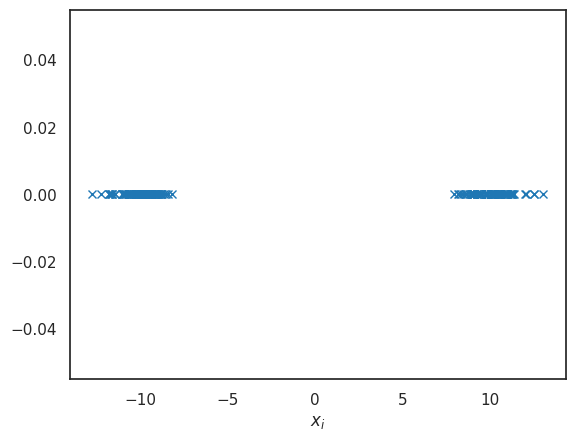

In [69]:
S=np.zeros((200))
S[0:100] = np.random.normal(-10, 1, 100)
S[100:200]=np.random.normal(10, 1, 100)
plt.plot(S,np.zeros((200)),'x')
plt.xlabel("$x_{i}$")
plt.show()

In [70]:
x = np.linspace(S.min()-3, S.max()+3, num=200)
density=kernel_density(S,x)

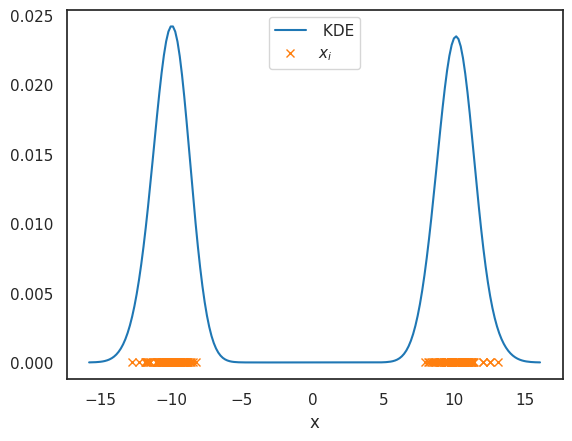

In [71]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.xlabel('x')
plt.legend()
plt.show()

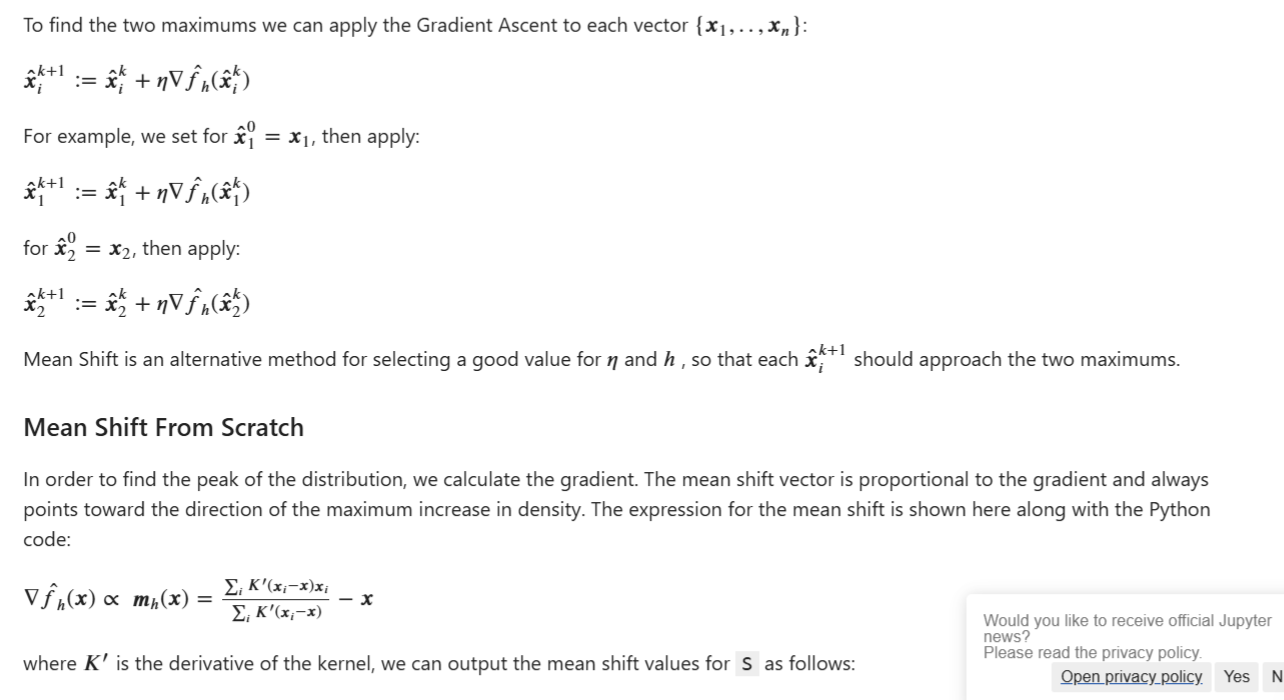

In [72]:
mean_shift=((density.reshape(-1,1)*S).sum(0) / density.sum())-x

If we overlay the mean shift value over the distribution,  𝒎ℎ(𝒙)
𝑚
ℎ
(
𝑥
)
 , we will see that vectors point towards the two peaks.

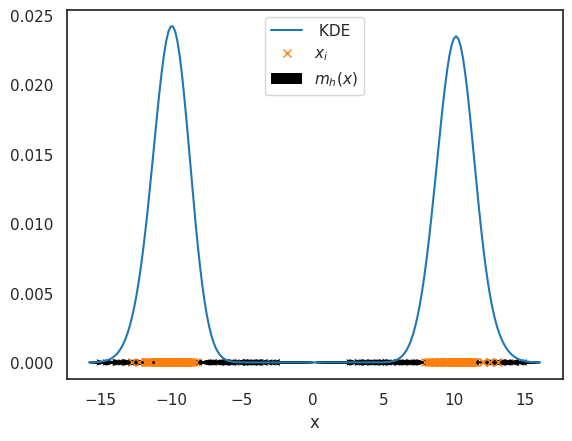

In [73]:
plt.plot(x,density,label=" KDE")
plt.plot(S,np.zeros((200,1)),'x',label="$x_{i}$")
plt.quiver(x, np.zeros((200,1)),mean_shift, np.zeros((200,1)), units='width',label="$m_{h}(x)$")
plt.xlabel('x')
plt.legend()
plt.show()

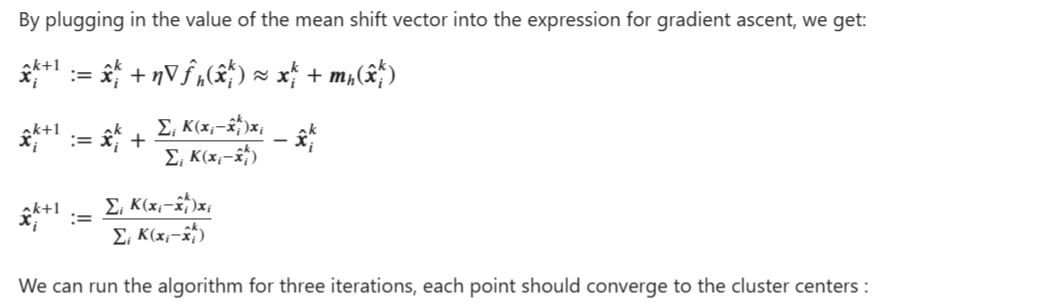

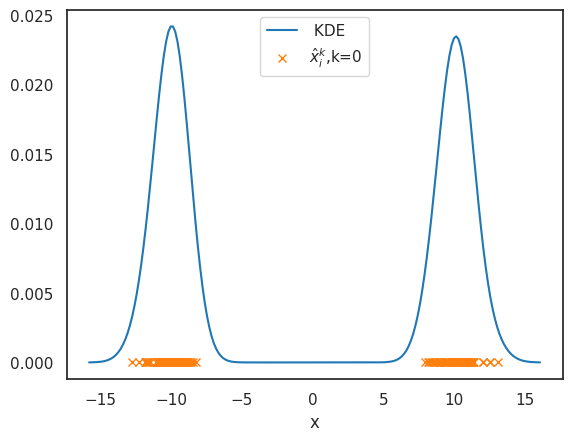

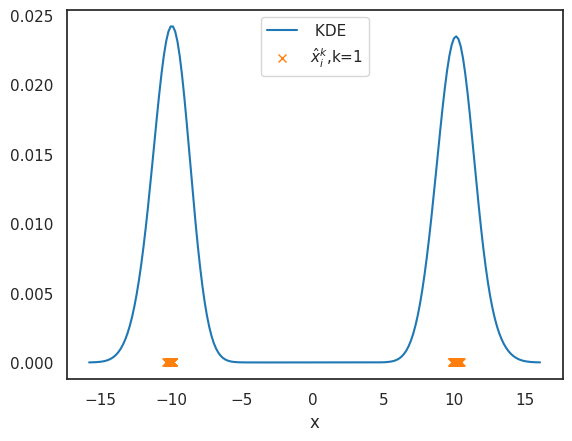

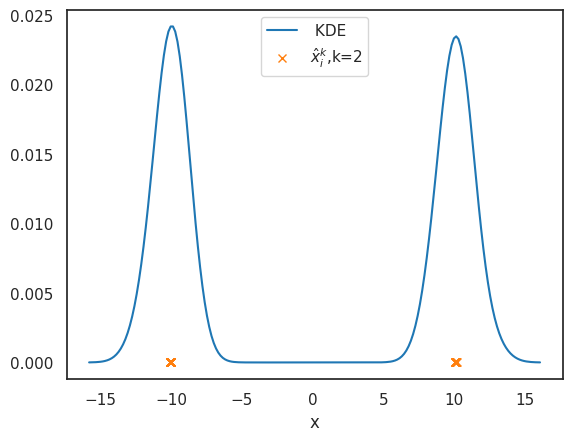

In [74]:
Xhat=np.copy(S.reshape(-1,1))
S_=S.reshape(-1,1)


for k in range(3):
    plt.plot(x,density,label=" KDE")
    plt.plot(Xhat,np.zeros((200,1)),'x',label="$\hat{x}^{k}_i$,k="+str(k))
    plt.xlabel('x')
    plt.legend()
    plt.show()

    for i,xhat in enumerate(Xhat):
        dist=np.sqrt(((xhat-S_)**2).sum(1))
        weight = gaussian(dist, 2.5)
        Xhat[i] = (weight.reshape(-1,1)*S_).sum(0) / weight.sum()

In practice, we will drop many of the data points, as they get closer together. Here is a quick way.

In [75]:
np.unique(Xhat.astype(int))

array([-10,  10])